In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()                                        #load_iris()是一個字典的資料
df = pd.DataFrame(iris["data"],                           #用pd的DataFrame表格功能把iris的data
                  columns=iris["feature_names"])          #---用feature_names的標題 以表格呈現出來
df                                                        #cluster用以分群，不用給予答案

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[存成csv檔的教學](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

因為沒有答案了所以也不用再train_test_split

In [36]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)     #代表使用k-Means這方法分成三群

[kMeans的用法](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [37]:
cluster.fit(iris["data"])          #將數據給予電腦學習
                                   #KMeans++的意思代表 一開始的圓心不要選太近的

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
df["label"] = cluster.labels_      #新增一欄label，使用cluster.labels_分出的三群給予編號
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [39]:
cluster.cluster_centers_      #分出三群後，這三群的平均數值(圓心為多少的意思)

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Text(0, 0.5, 'petal')

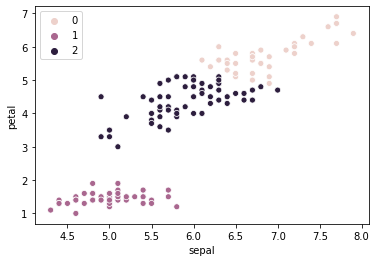

In [40]:
import matplotlib.pyplot as plt            #要繪製圖表便呼叫 matplotlib.pyplot                     
%matplotlib inline
#在python當中 秀圖的程式碼是plt.show() , 在jupyter中則是用%matplotlib inline, inline的意思是有圖就秀出來
import seaborn as sns                      #seaborn可安排畫什麼圖表 countplot、distplot
sns.scatterplot(df["sepal length (cm)"],   #x軸
                df["petal length (cm)"],   #Y軸
                hue=cluster.labels_)       #圖例依照label標示出來的群體命名
plt.xlabel("sepal")                        #可修改x軸的座標標題
plt.ylabel("petal")                        #可修改y軸的座標標題                         